# Inteligência Artificial em Ações

###### Passo a Passo

Ideia pricipal - Analisar dados e fundamentos das empresas e decidir qual empresa comprar e qual não comprar

1 - Escolher empresas

2 - Buscar fundamentos

3 - Buscar cotações

4 - definir forma de analise

5 - Tratamento dos dados

6 - Analise esploratória

7 - Feature selection

8 - Criar comparativo e avaliação

9 - Treinar modelo de IA

10 - Melhorar o melhor modelo

11 - Aplicar na pratica e testar resultados


# 1

Indice Bovespa - indices de ações 

Site Fundamentus - Buscar dados das empresas - 'https://fundamentus.com.br'

Balanço + DRE

## Pegar cotações

Vamos usar o pandas_datareader

pip install pandas_datareader

In [457]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os

In [458]:
cotacaoBovespa = web.DataReader('^BVSP', data_source='yahoo', start='06-01-2020', end='06-01-2021')

display(cotacaoBovespa.head())

#cotacaoBovespa['Adj Close'].plot(figsize=(20,10))
#plt.show()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-01,89019.0,86837.0,87395.0,88620.0,9849400.0,88620.0
2020-06-02,91046.0,88622.0,88622.0,91046.0,11827300.0,91046.0
2020-06-03,93710.0,91048.0,91048.0,93002.0,15137900.0,93002.0
2020-06-04,94132.0,92221.0,92993.0,93829.0,11488000.0,93829.0
2020-06-05,97356.0,93839.0,93839.0,94637.0,13320300.0,94637.0


In [459]:
cotacaoPetrobras = web.DataReader('PETR4.SA', data_source='yahoo', start='06-01-2020', end='06-01-2021')

display(cotacaoBovespa.head())

#cotacaoBovespa['Adj Close'].plot(figsize=(20,10))
#plt.show()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-01,89019.0,86837.0,87395.0,88620.0,9849400.0,88620.0
2020-06-02,91046.0,88622.0,88622.0,91046.0,11827300.0,91046.0
2020-06-03,93710.0,91048.0,91048.0,93002.0,15137900.0,93002.0
2020-06-04,94132.0,92221.0,92993.0,93829.0,11488000.0,93829.0
2020-06-05,97356.0,93839.0,93839.0,94637.0,13320300.0,94637.0


Buscado varias empresas

empresas = ['PETR4.SA', 'MGLU3.SA', 'MGLU3.SA', '^BVSP']

for empresa in empresas:
    print(empresa)
    cotacao = web.DataReader(f'{empresa}', data_source='yahoo', start='06-01-2020', end='06-01-2021')
    cotacao['Adj Close'].plot(figsize=(20,10))
    plt.show()

## Empresas que fazem parte do indice bovesta

In [460]:
#url = 'https://www.onze.com.br/blog/acoes-ibovespa/'

#df = pd.read_html(url)

#empresas = list(df[0][0].copy())

#print(empresas)

# 2

É preciso fazer o download de todas os balanços de cada empresa, coloquei todos na pasta balancos

#### Aramazenaremos todas os balanços e dres das empresas em um dicionario 'fundamentos'

In [461]:
fundamentos = {}

arquivos = os.listdir('balancos')

empresas = [ str(arquivo.split('_')[1].split('.')[0]) for arquivo in arquivos ]

len(empresas)

81

empresas selecionadas

In [462]:
empresas = ["ABEV3", "AZUL4", "BTOW3", "B3SA3", "BBSE3", "BRML3", "BBDC4", "BRAP4", "BBAS3", "BRKM5", "BRFS3", "BPAC11", "CRFB3", "CCRO3", "CMIG4", "HGTX3", "CIEL3", "COGN3", "CPLE6", "CSAN3", "CPFE3", "CVCB3", "CYRE3", "ECOR3", "ELET6", "EMBR3", "ENBR3", "ENGI11", "ENEV3", "EGIE3", "EQTL3", "EZTC3", "FLRY3", "GGBR4", "GOAU4", "GOLL4", "NTCO3", "HAPV3", "HYPE3", "IGTA3", "GNDI3", "ITSA4", "ITUB4", "JBSS3", "JHSF3", "KLBN11", "RENT3", "LCAM3", "LAME4", "LREN3", "MGLU3", "MRFG3", "BEEF3", "MRVE3", "MULT3", "PCAR3", "PETR4", "BRDT3", "PRIO3", "QUAL3", "RADL3", "RAIL3", "SBSP3", "SANB11", "CSNA3", "SULA11", "SUZB3", "TAEE11", "VIVT3", "TIMS3", "TOTS3", "UGPA3", "USIM5", "VALE3", "VVAR3", "WEGE3", "YDUQ3"]

In [463]:


def ajustar (df,nome):
    df.iloc[0, 0] = nome
    df.columns = df.iloc[0]
    df = df[1:]
    df.set_index(nome)
    return df
    
for arquivo in arquivos:
    
    nome = str(arquivo.split('_')[1].split('.')[0])
    
    if nome in empresas:
        
        balanco = ajustar(pd.read_excel(f'balancos/{arquivo}', sheet_name=0),nome)
        dre = ajustar(pd.read_excel(f'balancos/{arquivo}', sheet_name=1),nome)
        
        fundamentos[nome] = balanco.append(dre)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (30309) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (30309) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64274) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64274) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (68412) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (68412) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-z

WARNING *** file size (64280) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64280) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64286) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64286) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64424) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64424) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64280) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero

WARNING *** file size (64288) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64288) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64308) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64308) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (68210) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (68210) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (63832) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero

In [464]:
len(fundamentos)

77

# 3

buscar cotações

###### Armazenando cotações em um dicionario 'cotacoes'

In [465]:
cotacoes_df = pd.read_excel('cotacoes.xlsx')

cotacoes = {}

for empresa in cotacoes_df['Empresa'].unique():
    cotacoes[empresa] = cotacoes_df.loc[cotacoes_df['Empresa'] == empresa, :]

In [466]:
display(cotacoes['ABEV3'].head())

,Date,High,Low,Open,Close,Volume,Adj Close,Empresa
0,2012-12-20,17.376226,16.920275,17.352230,16.926273,1243126.0,12.422499,ABEV3
1,2012-12-21,17.202246,16.808285,16.926273,16.994267,1390141.0,12.472404,ABEV3
2,2012-12-26,17.090256,16.754292,17.002266,16.768290,1076609.0,12.306555,ABEV3
3,2012-12-27,16.870279,16.670300,16.722294,16.778288,1307633.0,12.448023,ABEV3
4,2012-12-28,16.916273,16.738293,16.858280,16.738293,2807786.0,12.418349,ABEV3


In [467]:
len(cotacoes)

77

##### removendo empresas que não contem todo o periodo de ações realizado

In [468]:
for empresa in empresas:
    if cotacoes[empresa].isnull().values.any():
        cotacoes.pop(empresa)
        fundamentos.pop(empresa)
        
print(len(cotacoes), len(fundamentos))

65 65


##### Mescando os dois dicts

In [469]:
display(fundamentos["ABEV3"])

for empresa in fundamentos:
        
    tabela = fundamentos[empresa].T
    
    if not tabela.index.name:
        tabela.columns = tabela.iloc[0]
        tabela = tabela.iloc[1:]
        
    tabela.index = pd.to_datetime(tabela.index, format='%d/%m/%Y')
    
    tabela_cotacao = cotacoes[empresa].set_index('Date')
    tabela_cotacao = tabela_cotacao[['Adj Close']]
    
    tabela = tabela.merge(tabela_cotacao, right_index=True, left_index=True)
    
    tabela.index.name = empresa
    
    fundamentos[empresa] = tabela

    

,ABEV3,31/12/2020,30/09/2020,30/06/2020,31/03/2020,31/12/2019,30/09/2019,30/06/2019,31/03/2019,31/12/2018,...,31/03/2015,31/12/2014,30/09/2014,30/06/2014,31/03/2014,31/12/2013,30/09/2013,30/06/2013,31/03/2013,31/12/2012
1,Ativo Total,1.25197e+08,1.27057e+08,1.21393e+08,1.13688e+08,1.01743e+08,1.02475e+08,9.8739e+07,9.69055e+07,9.41261e+07,...,75101184,7.21432e+07,6.51259e+07,6.2989e+07,6.3297e+07,6.8674e+07,5.9619e+07,5.87393e+07,1.34037e+06,1.3463e+06
2,Ativo Circulante,3.53426e+07,3.90988e+07,3.62681e+07,3.10864e+07,2.76211e+07,2.9004e+07,2.7356e+07,2.61941e+07,2.53296e+07,...,1.9241e+07,2.07284e+07,1.54466e+07,1.57733e+07,1.63523e+07,2.047e+07,1.24784e+07,1.20571e+07,77552,71641
3,Caixa e Equivalentes de Caixa,1.70903e+07,2.16605e+07,1.7439e+07,1.32045e+07,1.19007e+07,1.50169e+07,1.42334e+07,1.28225e+07,1.14635e+07,...,6.97458e+06,9.72207e+06,5.74812e+06,6.27386e+06,7.29618e+06,1.12858e+07,4.83517e+06,4.48217e+06,74204,48155
4,Aplicações Financeiras,1.70003e+06,1.44292e+06,44823,44823,14558,14304,14038,13772,13391,...,1.03376e+06,712958,526789,379938,410173,288604,612489,486133,0,0
5,Contas a Receber,4.30314e+06,4.15692e+06,4.20158e+06,3.3943e+06,4.49552e+06,4.23626e+06,4.10312e+06,3.98036e+06,4.87926e+06,...,2.8977e+06,3.02885e+06,3.27564e+06,3.53838e+06,3.11009e+06,3.61351e+06,2.74785e+06,2.78314e+06,3105,21490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,IR Diferido,-1.66758e+06,343476,595088,15365,-853995,427238,443414,346724,-1.16093e+06,...,-28029,-859414,475888,30916,403236,-197098,-462300,114066,-70,NaN
21,Participações/Contribuições Estatutárias,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Reversão dos Juros sobre Capital Próprio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Part. de Acionistas Não Controladores,-104363,-84167,-44517,-119468,-119273,-106708,-95168,-87218,-103126,...,-152180,-120675,-76946,-48724,-50162,-85133.1,-49296,-758399,NaN,NaN


In [470]:
print(len(fundamentos))

65


In [471]:
display(fundamentos['ABEV3'].head())

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,Outros Ativos Circulantes,...,Receitas,Despesas,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Participações/Contribuições Estatutárias,Reversão dos Juros sobre Capital Próprio,Part. de Acionistas Não Controladores,Lucro/Prejuízo do Período,Adj Close
ABEV3,,,,,,,,,,,,,,,,,,,,,
2020-12-31,1.25197e+08,3.53426e+07,1.70903e+07,1.70003e+06,4.30314e+06,7.6059e+06,0,3.28714e+06,293552,1.06251e+06,...,NaN,NaN,8.46431e+06,93644,-1.66758e+06,NaN,NaN,-104363,6.78601e+06,15.575767
2020-09-30,1.27057e+08,3.90988e+07,2.16605e+07,1.44292e+06,4.15692e+06,7.34184e+06,0,3.47288e+06,298303,725479,...,NaN,NaN,2431040,-415548,343476,NaN,NaN,-84167,2.2748e+06,12.159024
2020-06-30,1.21393e+08,3.62681e+07,1.7439e+07,44823,4.20158e+06,7.77162e+06,0,5.39034e+06,356411,1.0644e+06,...,NaN,NaN,1.10817e+06,-431945,595088,NaN,NaN,-44517,1.2268e+06,13.710416
2020-03-31,1.13688e+08,3.10864e+07,1.32045e+07,44823,3.3943e+06,7.75266e+06,0,5.26641e+06,447474,976225,...,NaN,NaN,1.49092e+06,-295033,15365,NaN,NaN,-119468,1.09178e+06,11.557861
2019-12-31,1.01743e+08,2.76211e+07,1.19007e+07,14558,4.49552e+06,5.97856e+06,0,4.07413e+06,512532,645172,...,NaN,NaN,3.75505e+06,1.31792e+06,-853995,NaN,NaN,-119273,4.0997e+06,18.102791


#### Remover empresas que trabalha com tipos dados diferentes, comparando as colunas

In [472]:
colunas = list(fundamentos['ABEV3'].columns)

fund = fundamentos.copy()

for empresa in fundamentos:
    if set(colunas) != set(fundamentos[empresa].columns):
        fund.pop(empresa)
        
fundamentos = fund.copy()

print(len(fundamentos))

61


alterando nomes de colunas repetidos

In [473]:
texto_colunas = ";".join(colunas)

colunas_modificadas = []

for coluna in colunas:
    
    if colunas.count(coluna) > 1 and coluna not in colunas_modificadas:
        
        texto_colunas = texto_colunas.replace(';' + coluna + ';', ';' + coluna + '_1;', 1)
        
        colunas_modificadas.append(coluna)
        
colunas = texto_colunas.split(';')

In [474]:
for empresa in fundamentos:
    
    fundamentos[empresa].columns = colunas

### Remover colunas com valores nulos

In [475]:
valores_vazios = dict.fromkeys(colunas, 0)

total_linhas = 0

for empresa in fundamentos:
    
    tabela = fundamentos[empresa]
    
    total_linhas += tabela.shape[0]
    
    for coluna in colunas:
        
        qtde_vazios = pd.isnull(tabela[coluna]).sum()
        
        valores_vazios[coluna] += qtde_vazios
        
print(valores_vazios)
print('\n', total_linhas)

{'Ativo Total': 0, 'Ativo Circulante': 0, 'Caixa e Equivalentes de Caixa': 0, 'Aplicações Financeiras': 0, 'Contas a Receber_1': 0, 'Estoques_1': 0, 'Ativos Biológicos_1': 0, 'Tributos a Recuperar': 0, 'Despesas Antecipadas_1': 0, 'Outros Ativos Circulantes': 0, 'Ativo Realizável a Longo Prazo': 0, 'Aplicações Financeiras Avaliadas a Valor Justo': 0, 'Aplicações Financeiras Avaliadas ao Custo Amortizado': 0, 'Contas a Receber': 0, 'Estoques': 0, 'Ativos Biológicos': 0, 'Tributos Diferidos_1': 0, 'Despesas Antecipadas': 0, 'Créditos com Partes Relacionadas': 0, 'Outros Ativos Não Circulantes': 0, 'Investimentos': 0, 'Imobilizado': 0, 'Intangível': 0, 'Diferido': 0, 'Passivo Total': 0, 'Passivo Circulante': 0, 'Obrigações Sociais e Trabalhistas': 0, 'Fornecedores': 0, 'Obrigações Fiscais': 0, 'Empréstimos e Financiamentos_1': 0, 'Passivos com Partes Relacionadas_1': 0, 'Dividendos e JCP a Pagar': 0, 'Outros_1': 0, 'Provisões_1': 0, 'Passivos sobre Ativos Não-Correntes a Venda e Descontin

In [476]:
remover_colunas = [ coluna for coluna in valores_vazios if valores_vazios[coluna] > 50 ]

for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].drop(remover_colunas, axis=1)
    fundamentos[empresa] = fundamentos[empresa].ffill()  #substitui os valores vazios com os mesmos valores da linha a cima

In [477]:
print(fundamentos['ABEV3'].shape)

(33, 72)


## 4    
### Analise de regras para IA

Vamos criar tres regras, comprar, não comprar e vender (se o modelo analisar apenas quais comprar a probabilidade de erros é maior)... 

1. Subio mais do que o bovespa (ou caiu menos) -> COMPRAR (valor = 2)
2. Subio menos que o bovespa até 2% (ou caiu mais que bovespa até 2%) -> NÃO COMPRAR (valor = 1)
3. Subio menos que o bovespa mais que 2% (ou caiu mais que o bovespa mais que 2%) -> VENDER (valor = 0)

> Para isso analiseramenos as porcentagens de variações entre os trimestres

In [478]:
data_inical = '12/20/2012'
data_final = '04/20/2021'

df_BVSP = web.DataReader('^BVSP', data_source='yahoo', start = data_inical, end=data_final)

display(df_BVSP.head(3))

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-20,61276.0,60622.0,60992.0,61276.0,3083400.0,61276.0
2012-12-21,61271.0,60221.0,61271.0,61007.0,3157400.0,61007.0
2012-12-26,61322.0,60861.0,61003.0,60960.0,2598000.0,60960.0


In [479]:
datas = fundamentos['ABEV3'].index

print(datas)

DatetimeIndex(['2020-12-31', '2020-09-30', '2020-06-30', '2020-03-31',
               '2019-12-31', '2019-09-30', '2019-06-30', '2019-03-31',
               '2018-12-31', '2018-09-30', '2018-06-30', '2018-03-31',
               '2017-12-31', '2017-09-30', '2017-06-30', '2017-03-31',
               '2016-12-31', '2016-09-30', '2016-06-30', '2016-03-31',
               '2015-12-31', '2015-09-30', '2015-06-30', '2015-03-31',
               '2014-12-31', '2014-09-30', '2014-06-30', '2014-03-31',
               '2013-12-31', '2013-09-30', '2013-06-30', '2013-03-31',
               '2012-12-31'],
              dtype='datetime64[ns]', name='ABEV3', freq='-1Q-DEC')


In [480]:
for data in datas:
    if not data in df_BVSP.index:
        df_BVSP.loc[data] = np.nan
        
df_BVSP = df_BVSP.sort_index()
df_BVSP = df_BVSP.ffill()
df_BVSP = df_BVSP.rename(columns={'Adj Close': 'IBOV'})

#display(df_BVSP)

In [481]:
for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].merge(df_BVSP[['IBOV']], left_index=True, right_index=True)
    
display(fundamentos['ABEV3'].head(3))

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Ativos Biológicos_1,Tributos a Recuperar,Despesas Antecipadas_1,Outros Ativos Circulantes,...,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Adj Close,IBOV
2020-12-31,1.251966e+08,3.534261e+07,1.709034e+07,1700028.032,4303137.792,7605904.896,0,3287141.888,293552.000,1062513.984,...,-9428,1040928.960,2144160.000,-1103231.104,8464308.224,93644.000,-1667579.008,6786009.600,15.575767,119306.0
2020-09-30,1.270568e+08,3.909879e+07,2.166045e+07,1442923.008,4156922.880,7341836.800,0,3472880.896,298303.008,725478.976,...,-11002,-1144775.936,369476.992,-1514253.056,2431040.000,-415548.000,343476.000,2274800.896,12.159024,94603.0
2020-06-30,1.213930e+08,3.626813e+07,1.743895e+07,44823.000,4201583.104,7771618.816,0,5390340.096,356411.008,1064401.984,...,-16237,-793734.976,236606.000,-1030340.992,1108173.056,-431944.992,595088.000,1226798.976,13.710416,95056.0


#### Tranformar indicadores em percentuais

% trimestre de fundamentos = fundamentos trimestre atual / fundamentos do trimestre anterior (-1)

% trimestre da cotação = cotação trimestre seguinte (+1) / cotação do trimestre atual

In [482]:
for empresa in fundamentos:
    
    fundamento = fundamentos[empresa].sort_index()
    
    for coluna in fundamento:
         
        if 'Adj Close' not in coluna and 'IBOV' not in coluna:
        
            condicoes = [
                (fundamento[coluna].shift(1) > 0) & (fundamento[coluna] < 0),
                (fundamento[coluna].shift(1) < 0) & (fundamento[coluna] > 0),
                (fundamento[coluna].shift(1) < 0) & (fundamento[coluna] < 0),
                (fundamento[coluna].shift(1) == 0) & (fundamento[coluna] > 0),
                (fundamento[coluna].shift(1) == 0) & (fundamento[coluna] < 0),
                (fundamento[coluna].shift(1) < 0) & (fundamento[coluna] == 0),
            ]
            valores = [
                -1,
                1,
                (abs(fundamento[coluna].shift(1))-abs(fundamento[coluna])) / abs(fundamento[coluna].shift(1)),
                1,
                -1,
                1,
            ]
            
            fundamento[coluna] = np.select(condicoes, valores, default= fundamento[coluna] / fundamento[coluna].shift(1) - 1)
            
            
    fundamento['Adj Close'] = fundamento['Adj Close'].shift(-1) / fundamento['Adj Close'] -1
    fundamento['IBOV'] = fundamento['IBOV'].shift(-1) / fundamento['IBOV'] -1
            
    fundamento['Resultado'] = fundamento['Adj Close'] - fundamento['IBOV']
            
    condicoes = [
            (fundamento['Resultado'] > 0),
            (fundamento['Resultado'] < 0) & (fundamento['Resultado'] >= -0.02),
            (fundamento['Resultado'] < -0.02),
        ]
    valores = [2,1,0]
            
    fundamento['Decisao'] = np.select(condicoes, valores) 
    
    fundamentos[empresa] = fundamento

In [483]:
display(fundamentos['ABEV3'].head(3))

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Ativos Biológicos_1,Tributos a Recuperar,Despesas Antecipadas_1,Outros Ativos Circulantes,...,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Adj Close,IBOV,Resultado,Decisao
2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.013860,-0.075469,0.061609,2
2013-03-31,-0.004402,0.082509,0.540941,NaN,-0.855514,NaN,NaN,-0.878257,NaN,NaN,...,0.0000,NaN,0.000000,0.000000,0.0,0.000000,0.011719,-0.157847,0.169566,2
2013-06-30,42.823044,154.470551,59.403415,1.0,895.341086,1.0,NaN,3040.654255,1.0,1.0,...,68.3504,-1.0,240.798915,-3992.348051,1.0,115.885753,0.029640,0.102851,-0.073211,0


## 5
### Tratando dados

In [484]:
colunas = list(fundamentos['ABEV3'].columns)

valores_vazios = dict.fromkeys(colunas, 0)

total_linhas = 0

for empresa in fundamentos:
    
    tabela = fundamentos[empresa]
    
    total_linhas += tabela.shape[0]
    
    for coluna in colunas:
        
        qtde_vazios = pd.isnull(tabela[coluna]).sum()
        
        valores_vazios[coluna] += qtde_vazios
        

remover_colunas = [ coluna for coluna in valores_vazios if valores_vazios[coluna] > total_linhas / 3 ]

for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].drop(remover_colunas, axis=1)
    fundamentos[empresa] = fundamentos[empresa].fillna(0)  #substitui os valores vazios por 0

display(fundamentos['ABEV3'].head(3))

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Tributos a Recuperar,Outros Ativos Circulantes,Ativo Realizável a Longo Prazo,Outros Ativos Não Circulantes,...,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Adj Close,IBOV,Resultado,Decisao
2012-12-31,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0000,0.0,0.000000,0.000000,0.0,0.000000,-0.013860,-0.075469,0.061609,2
2013-03-31,-0.004402,0.082509,0.540941,0.0,-0.855514,0.0,-0.878257,0.0,1.000000,0.0,...,0.0000,0.0,0.000000,0.000000,0.0,0.000000,0.011719,-0.157847,0.169566,2
2013-06-30,42.823044,154.470551,59.403415,1.0,895.341086,1.0,3040.654255,1.0,2.274961,1.0,...,68.3504,-1.0,240.798915,-3992.348051,1.0,115.885753,0.029640,0.102851,-0.073211,0


In [485]:
for empresa in fundamentos:
    
    fundamentos[empresa] = fundamentos[empresa].drop(['Adj Close', 'IBOV', 'Resultado'], axis=1)

### Compilando Todos DF em um unico DF

In [486]:
copia_fundamentos = fundamentos.copy()

In [487]:
base_dados = pd.DataFrame()

for empresa in copia_fundamentos:
    
    copia_fundamentos[empresa] = copia_fundamentos[empresa][1:-1]
    copia_fundamentos[empresa] = copia_fundamentos[empresa].reset_index(drop=True)
    
    base_dados = base_dados.append(copia_fundamentos[empresa])

In [488]:
display(base_dados.shape)

(1882, 47)

'

## 6 
### Analise exploratória

Visualização dos dados - qtde de dicições de cada tipo

In [489]:
base_dados['Decisao'].value_counts(normalize=True).map('{:.1%}'.format)

2    50.0%
0    43.7%
1     6.3%
Name: Decisao, dtype: object

In [490]:
grafico = px.histogram(base_dados, x='Decisao', color='Decisao')
grafico.show()

Remover valores de decisao 1 = não comprar => 0 = vender 

In [491]:
base_dados.loc[base_dados['Decisao']==1, 'Decisao'] = 0

In [492]:
base_dados['Decisao'].value_counts(normalize=True).map('{:.1%}'.format)

2    50.0%
0    50.0%
Name: Decisao, dtype: object

### Analise de correlação (seaborn)

In [493]:
# Criando tabela de correlações com pandas

correlacoes = base_dados.corr()

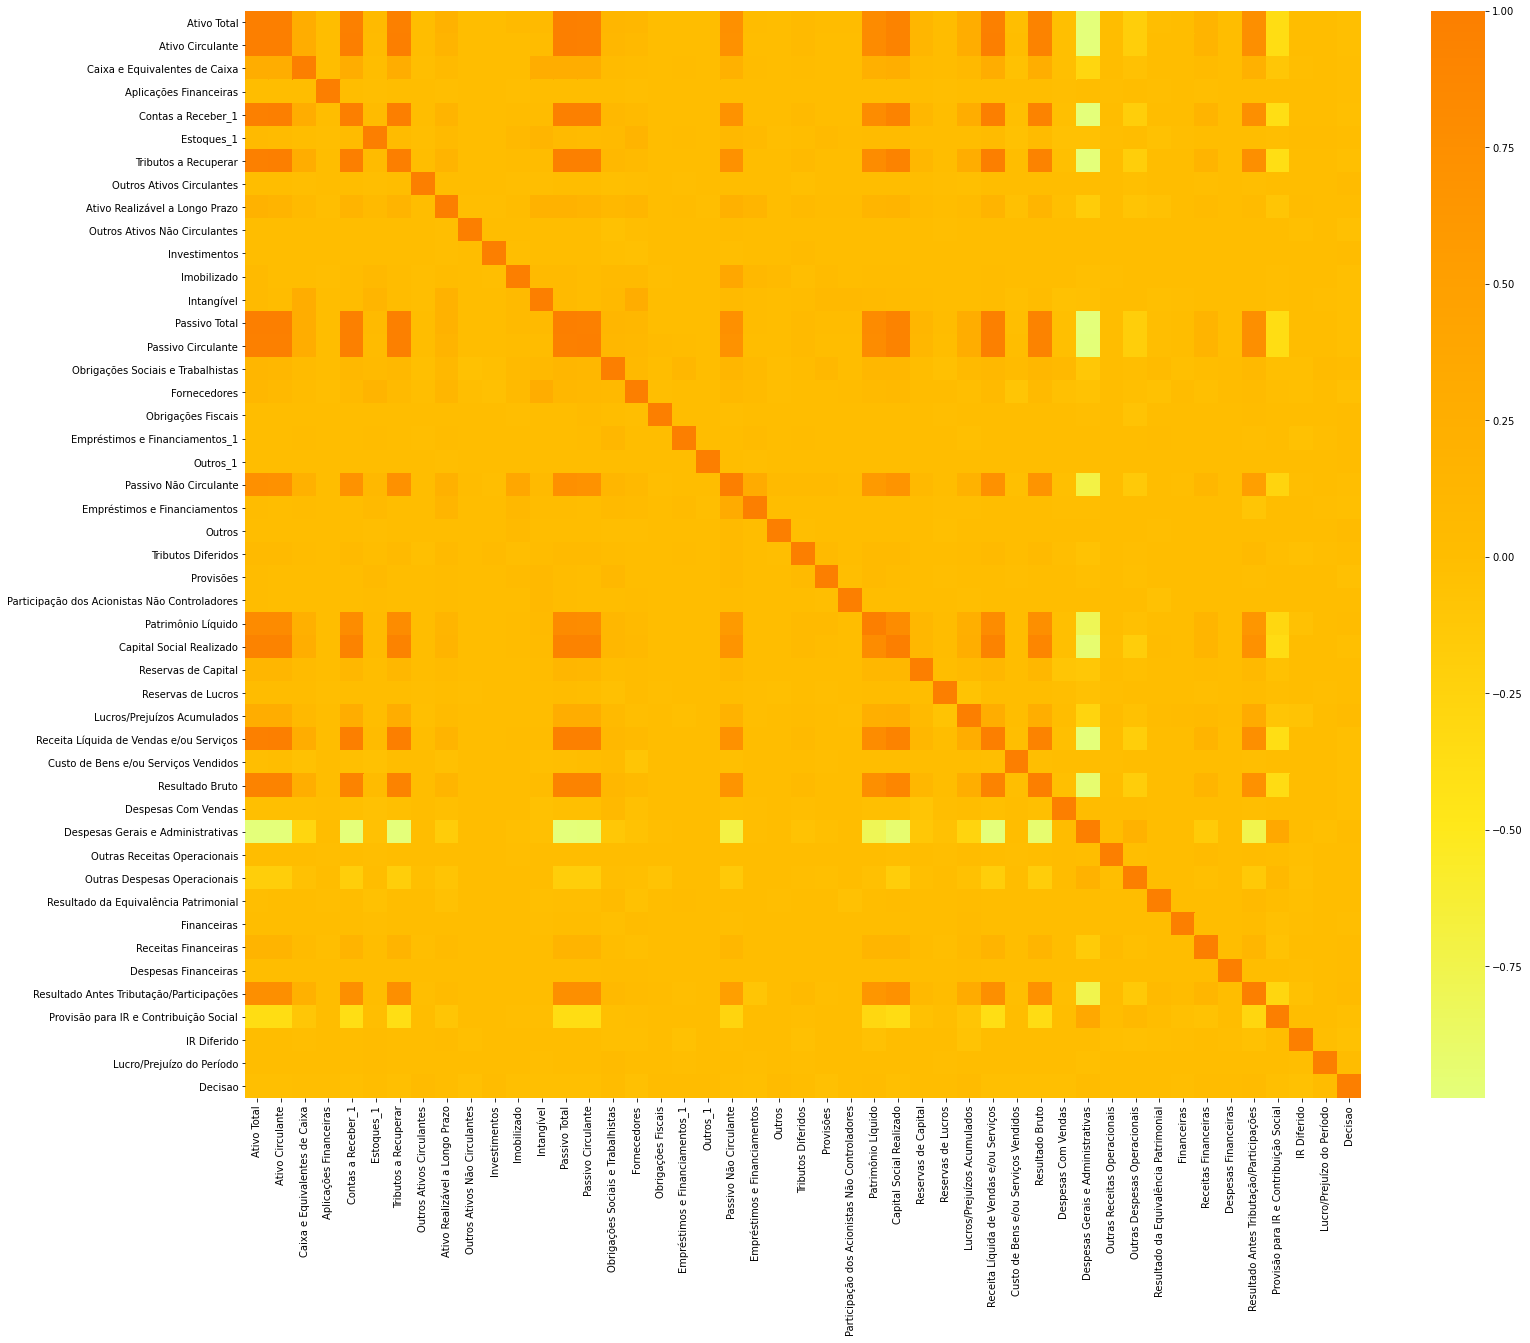

In [494]:
# grafico seaborn

fig, ax = plt.subplots(figsize=(25,20))

sns.heatmap(correlacoes, ax=ax, cmap='Wistia')

plt.show()

Remover correlações maiores 0.8 (não atrapalhar decisões da IA)

In [495]:
def identificarCorrelacoesEntreColunas(df):

    correlacoes_encontradas = []

    for coluna in df:
        for linha in df.index:

            if linha != coluna:

                valor = abs(df.loc[linha,coluna])

                if valor > 0.8 and (coluna, linha, valor) not in correlacoes_encontradas:

                    correlacoes_encontradas.append((linha, coluna, valor))

    remover_colunas = [ tup[0] for tup in correlacoes_encontradas if tup[1] == 'Ativo Total']

    return list(remover_colunas)

In [496]:
remover_colunas = identificarCorrelacoesEntreColunas(correlacoes)

print(len(remover_colunas))

10


In [497]:
base_dados = base_dados.drop(remover_colunas, axis=1)

In [498]:
correlacoes = base_dados.corr()

remover_colunas = identificarCorrelacoesEntreColunas(correlacoes)

print(len(remover_colunas))

0


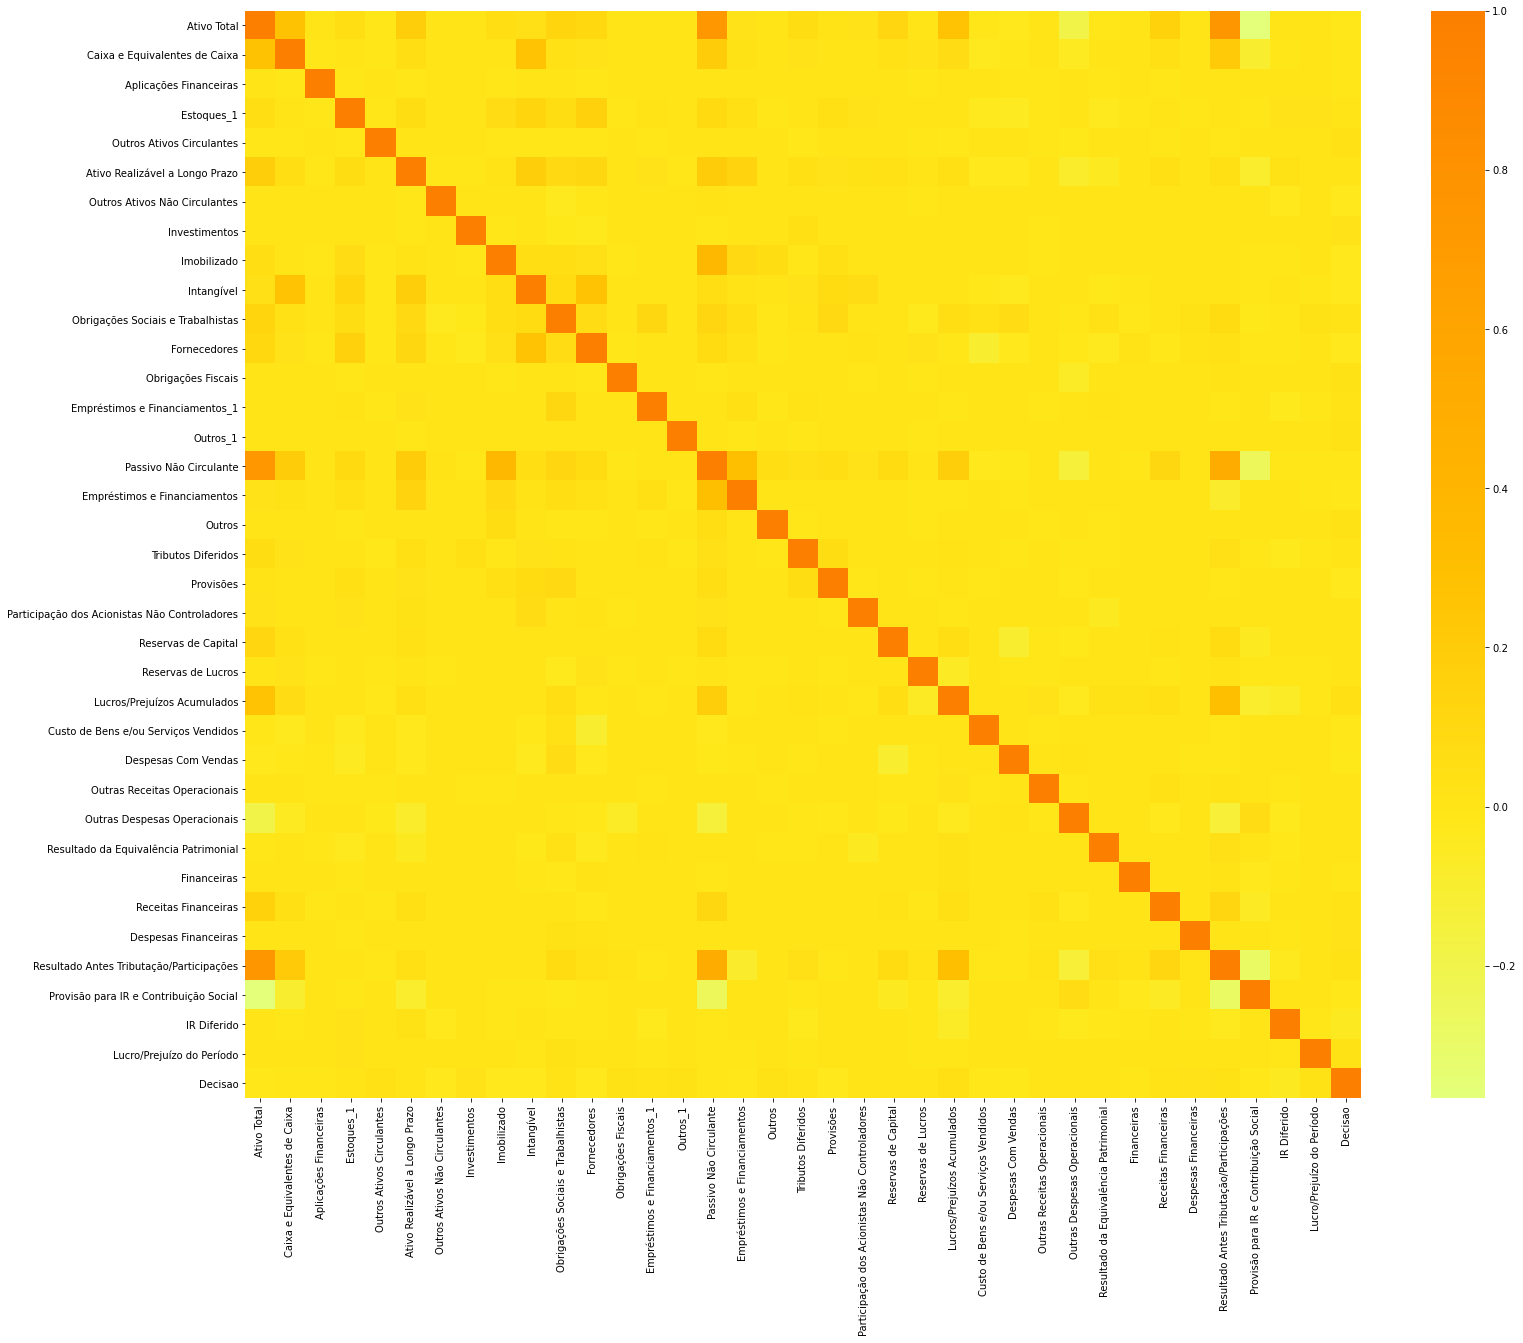

In [499]:
fig, ax = plt.subplots(figsize=(25,20))

sns.heatmap(correlacoes, ax=ax, cmap='Wistia')

plt.show()

# 7

## Feature selection

- Treinar uma inteligencia artificial para apontar quais colunas tem maior relevancia e reduzir a quantidade de colunas que serão estudadas pela IA

In [500]:
from sklearn.ensemble import ExtraTreesClassifier

In [501]:
modelo = ExtraTreesClassifier(random_state=1)

x = base_dados.drop('Decisao', axis=1)
y = base_dados['Decisao']

modelo.fit(x,y)

caracteristicas_importantes = pd.DataFrame(modelo.feature_importances_, x.columns).sort_values(by=0, ascending=False)

top10 = list(caracteristicas_importantes.index)[:10]

print(top10)

['Fornecedores', 'Outros Ativos Circulantes', 'Lucros/Prejuízos Acumulados', 'Resultado Antes Tributação/Participações', 'Ativo Total', 'Obrigações Sociais e Trabalhistas', 'Obrigações Fiscais', 'Custo de Bens e/ou Serviços Vendidos', 'Resultado da Equivalência Patrimonial', 'Tributos Diferidos']


### Standard Scaler - padorniza a base de dados para melhorar a IA

In [503]:
from sklearn.preprocessing import StandardScaler

In [504]:
def ajustar_scaler (df, campo_respostas):
    
    scaler = StandardScaler()
    
    df_auxiliar = df.drop(campo_respostas, axis=1)
    
    df_auxiliar = pd.DataFrame(scaler.fit_transform(df_auxiliar), df_auxiliar.index, df_auxiliar.columns)
    
    df_auxiliar[campo_respostas] = df[campo_respostas]
    
    return df_auxiliar

In [505]:
nova_base_dados = ajustar_scaler(base_dados, 'Decisao')

In [506]:
top10.append('Decisao')

In [508]:
nova_base_dados = nova_base_dados[top10].reset_index(drop=True)

display(nova_base_dados.head(3))

,Fornecedores,Outros Ativos Circulantes,Lucros/Prejuízos Acumulados,Resultado Antes Tributação/Participações,Ativo Total,Obrigações Sociais e Trabalhistas,Obrigações Fiscais,Custo de Bens e/ou Serviços Vendidos,Resultado da Equivalência Patrimonial,Tributos Diferidos,Decisao
0,-0.128485,-0.034116,0.191517,-0.038799,-0.057810,-4.396845,-0.054656,0.033336,-0.004714,-0.090125,2
1,2.127262,-0.027903,11.816382,33.145593,43.006573,4.066346,0.063274,-0.123545,0.116959,2.210854,0
2,0.156604,-0.032969,0.090433,0.004217,-0.038324,0.630917,-0.056533,0.020923,4.755571,-0.028989,2


# 8

## Criar comparativo e avaliação

### Separar Dados de Treino e Testes

In [509]:
from sklearn.model_selection import train_test_split

In [511]:
x = nova_base_dados.drop('Decisao', axis=1)
y = nova_base_dados['Decisao']

In [513]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, random_state=1)

## Dummy Classifier 

#### Chuta os resultados na mesma proporção que a base (assim comparamos se a IA é molhor do que o aleatório)

In [515]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [516]:
dummy = DummyClassifier(strategy='stratified', random_state=2)

dummy.fit(x_treino, y_treino)
previsao_dummy = dummy.predict(x_teste)

## Metricas de Avaliação

- precision é a metrica principal
- recall também é útil mas precision é mais importante!

In [540]:
def avaliar (y_teste, previsao, nome_modelo):
    
    print(f'MODELO: {nome_modelo}','\n')
    report = classification_report(y_teste, previsao)
    cf_matrix = pd.DataFrame(confusion_matrix(y_teste, previsao), index=['Vender', 'Comprar'], columns=['Vender', 'Comprar'])
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt=',')
    print(report)
    print('\n','Colunas são decisões do modelo, linhas quais eram respostas certas')
    plt.show()
    print('-'*120)

MODELO: Dummy 

              precision    recall  f1-score   support

           0       0.47      0.51      0.49       231
           2       0.49      0.46      0.47       240

    accuracy                           0.48       471
   macro avg       0.48      0.48      0.48       471
weighted avg       0.48      0.48      0.48       471


 Colunas são decisões do modelo, linhas quais eram respostas certas


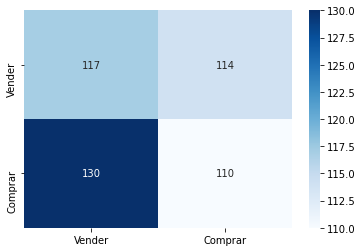

------------------------------------------------------------------------------------------------------------------------


In [541]:
avaliar(y_teste, previsao_dummy, "Dummy")

# 9 
## - Treinar modelos de IA

## Modelos de IA que vamos testar

- AdaBoost
- Decision Tree
- Random Forest
- ExtraTree
- Gradient Boost
- K Nearest Neighbors (KNN)
- Logistic Regression
- Naive Bayes
- Support Vector Machine (SVM)
- Rede Neural

In [542]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

modelos = {
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=1),
    "RandomForest": RandomForestClassifier(random_state=1),
    "ExtraTree": ExtraTreesClassifier(random_state=1),
    "GradientBoost": GradientBoostingClassifier(random_state=1),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(random_state=1),
    "NaiveBayes": GaussianNB(),
    "SVM": SVC(random_state=1),
    "RedeNeural": MLPClassifier(random_state=1, max_iter=400),
}

## Treinar todos os modelos importados

MODELO: AdaBoost 

              precision    recall  f1-score   support

           0       0.53      0.54      0.54       231
           2       0.55      0.54      0.55       240

    accuracy                           0.54       471
   macro avg       0.54      0.54      0.54       471
weighted avg       0.54      0.54      0.54       471


 Colunas são decisões do modelo, linhas quais eram respostas certas


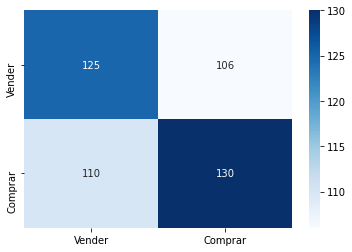

------------------------------------------------------------------------------------------------------------------------
MODELO: DecisionTree 

              precision    recall  f1-score   support

           0       0.50      0.53      0.52       231
           2       0.52      0.49      0.50       240

    accuracy                           0.51       471
   macro avg       0.51      0.51      0.51       471
weighted avg       0.51      0.51      0.51       471


 Colunas são decisões do modelo, linhas quais eram respostas certas


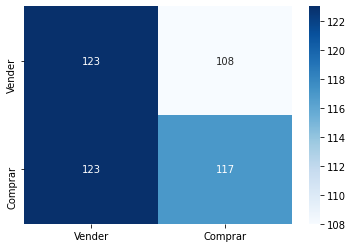

------------------------------------------------------------------------------------------------------------------------
MODELO: RandomForest 

              precision    recall  f1-score   support

           0       0.54      0.56      0.55       231
           2       0.56      0.53      0.54       240

    accuracy                           0.55       471
   macro avg       0.55      0.55      0.55       471
weighted avg       0.55      0.55      0.55       471


 Colunas são decisões do modelo, linhas quais eram respostas certas


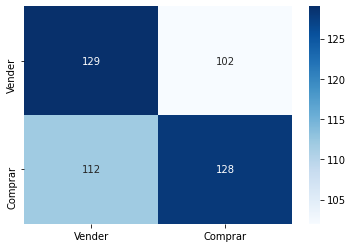

------------------------------------------------------------------------------------------------------------------------
MODELO: ExtraTree 

              precision    recall  f1-score   support

           0       0.52      0.54      0.53       231
           2       0.54      0.51      0.52       240

    accuracy                           0.53       471
   macro avg       0.53      0.53      0.53       471
weighted avg       0.53      0.53      0.53       471


 Colunas são decisões do modelo, linhas quais eram respostas certas


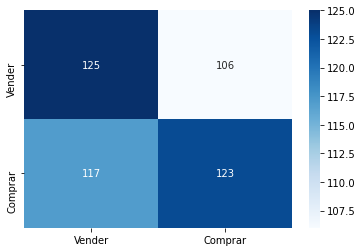

------------------------------------------------------------------------------------------------------------------------
MODELO: GradientBoost 

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       231
           2       0.53      0.54      0.54       240

    accuracy                           0.52       471
   macro avg       0.52      0.52      0.52       471
weighted avg       0.52      0.52      0.52       471


 Colunas são decisões do modelo, linhas quais eram respostas certas


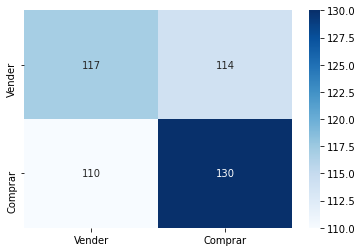

------------------------------------------------------------------------------------------------------------------------
MODELO: KNN 

              precision    recall  f1-score   support

           0       0.53      0.54      0.53       231
           2       0.55      0.54      0.55       240

    accuracy                           0.54       471
   macro avg       0.54      0.54      0.54       471
weighted avg       0.54      0.54      0.54       471


 Colunas são decisões do modelo, linhas quais eram respostas certas


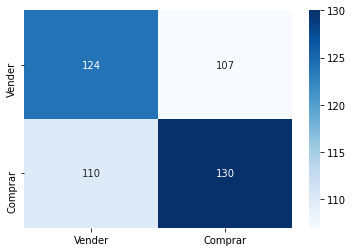

------------------------------------------------------------------------------------------------------------------------
MODELO: LogisticRegression 

              precision    recall  f1-score   support

           0       0.51      0.57      0.54       231
           2       0.53      0.47      0.50       240

    accuracy                           0.52       471
   macro avg       0.52      0.52      0.52       471
weighted avg       0.52      0.52      0.52       471


 Colunas são decisões do modelo, linhas quais eram respostas certas


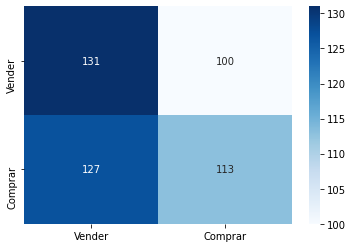

------------------------------------------------------------------------------------------------------------------------
MODELO: NaiveBayes 

              precision    recall  f1-score   support

           0       0.48      0.89      0.63       231
           2       0.46      0.09      0.15       240

    accuracy                           0.48       471
   macro avg       0.47      0.49      0.39       471
weighted avg       0.47      0.48      0.39       471


 Colunas são decisões do modelo, linhas quais eram respostas certas


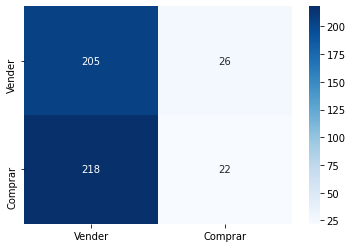

------------------------------------------------------------------------------------------------------------------------
MODELO: SVM 

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       231
           2       0.56      0.33      0.41       240

    accuracy                           0.52       471
   macro avg       0.53      0.53      0.51       471
weighted avg       0.53      0.52      0.50       471


 Colunas são decisões do modelo, linhas quais eram respostas certas


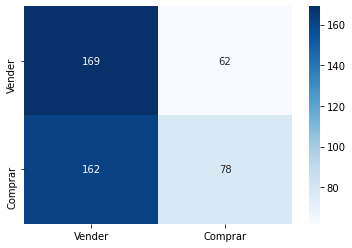

------------------------------------------------------------------------------------------------------------------------
MODELO: RedeNeural 

              precision    recall  f1-score   support

           0       0.52      0.64      0.57       231
           2       0.55      0.42      0.48       240

    accuracy                           0.53       471
   macro avg       0.53      0.53      0.52       471
weighted avg       0.53      0.53      0.52       471


 Colunas são decisões do modelo, linhas quais eram respostas certas


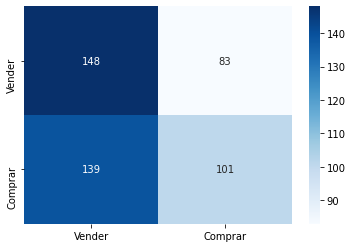

------------------------------------------------------------------------------------------------------------------------


In [543]:
for nome_modelo in modelos:
    modelo = modelos[nome_modelo]
    modelo.fit(x_treino, y_treino)
    previsoes = modelo.predict(x_teste)
    
    avaliar(y_teste, previsoes, nome_modelo)
    
    modelos[nome_modelo] = modelo

# 10

## Melhorar o melhor modelo

### modelo escolhido: RandomForest

##### Metricas de decisões de: 'COMPRAR'
- Criterio principal:  
    - precision: 0.56 
- Criterio de desempate:
    - recall: 0.53

### Tunning do modelo
#### Parametros padrões do modelo

- n_estimators = 100
- max_features = 'auto'
- min_sample_split = 2

gridsearch -> testa as combinações

In [552]:
modelo_final = modelos["RandomForest"]

n_estimators = range(10, 251, 30)
max_features = list(range(2,11,2))
max_features.append('auto')
min_samples_split = range(2,11,2)
#entre os valores testados garamtimos que os valores padrões serão inclusos

In [553]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score

In [558]:
precision2_score = make_scorer(precision_score, labels=[2], average='macro')

In [ ]:
grid = GridSearchCV(
    estimator= RandomForestClassifier(),
    param_grid={
        'n_estimators': n_estimators,
        'max_features': max_features,
        'min_samples_split': min_samples_split,
        'random_state': [1],
    },
    scoring=precision2_score
)

resultado_grid = grid.fit(x_treino, y_treino)
print('Treino concluido!')

MODELO: RandomForest Melhorado 

              precision    recall  f1-score   support

           0       0.55      0.59      0.57       231
           2       0.57      0.53      0.55       240

    accuracy                           0.56       471
   macro avg       0.56      0.56      0.56       471
weighted avg       0.56      0.56      0.56       471


 Colunas são decisões do modelo, linhas quais eram respostas certas


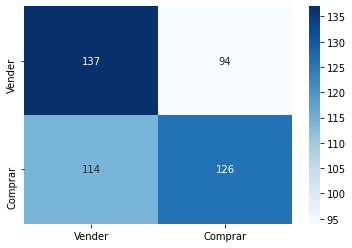

------------------------------------------------------------------------------------------------------------------------


In [585]:
modelo_melhorado = resultado_grid.best_estimator_
previsoes = modelo_melhorado.predict(x_teste)

avaliar(y_teste, previsoes, 'RandomForest Melhorado')

## 11 
### Aplicar na pratica e testar resultados

In [586]:
ultimo_trimestre_fundamentos = fundamentos.copy()

ultimo_trimestre_base_dados = pd.DataFrame()

lista_empresas = []
for empresa in ultimo_trimestre_fundamentos:
    
    ultimo_trimestre_fundamentos[empresa] = ultimo_trimestre_fundamentos[empresa][-1:]
    ultimo_trimestre_fundamentos[empresa] = ultimo_trimestre_fundamentos[empresa].reset_index(drop=True)
    lista_empresas.append(empresa)
    
    ultimo_trimestre_base_dados = ultimo_trimestre_base_dados.append(ultimo_trimestre_fundamentos[empresa])
    
display(ultimo_trimestre_base_dados)
print(lista_empresas)

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Tributos a Recuperar,Outros Ativos Circulantes,Ativo Realizável a Longo Prazo,Outros Ativos Não Circulantes,...,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Decisao
0,-0.014641,-0.096069,-0.210989,0.178183,0.035174,0.035968,-0.053483,0.464569,0.338638,0.000000,...,-2.201752,0.143065,1.000000,4.803230,0.271435,2.481764,1.000000,-1.000000,1.983122,0
0,0.021032,0.060388,0.114767,0.054163,0.191414,0.000000,0.097072,-0.601857,0.047464,0.000000,...,0.813033,0.236324,1.000000,0.397435,0.653082,0.040481,-0.796482,0.024238,-0.034832,0
0,-0.065052,-0.090455,-0.049868,-0.303305,0.019817,-0.104190,0.039895,-0.198159,0.136495,0.000000,...,-0.628015,0.000000,-0.140260,-1.000000,1.000000,0.362254,-0.062285,10.778637,0.956088,0
0,0.077453,0.757451,3.909083,0.000000,-1.000000,0.000000,0.000000,0.000000,0.260903,0.000000,...,-213.763780,2.023065,-0.056459,-0.209859,0.299164,1.953086,0.000000,0.000000,1.739273,0
0,-0.029646,-0.042750,-0.335301,0.003408,0.428888,0.073564,1.335030,0.474968,-0.029399,0.000000,...,0.815659,0.000000,-0.067332,1.109213,-0.216112,0.609079,-2.668301,1.000000,3.192166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.059826,0.281415,0.404819,0.000000,0.453531,-0.135756,-0.009355,0.769217,-0.117712,-0.465480,...,-9.237912,-6.941333,0.500872,-0.063966,0.480029,-0.724239,-1.607730,1.000000,-0.691015,0
0,-0.004568,-0.144531,-0.310447,0.000000,-0.022350,0.216183,-0.125387,-0.060282,-0.001100,-0.112840,...,0.265281,-0.151625,-16.417323,-0.548024,-0.069133,0.094810,1.000000,-0.284516,0.067110,0
0,0.099594,0.079650,0.406221,0.000000,0.003426,0.108797,-0.061279,0.032653,0.223863,0.054348,...,-0.558935,-0.250000,0.336449,0.000000,0.000000,-0.973077,0.000000,0.000000,-0.430508,0
0,0.046146,0.084131,0.487545,-0.395777,-0.041297,0.042082,-0.040685,0.203724,-0.188943,0.000000,...,-0.275642,-0.817027,1.000000,0.273026,-0.054605,0.107135,-0.119981,1.451443,0.152089,0


['ABEV3', 'B3SA3', 'BEEF3', 'BRAP4', 'BRFS3', 'BRKM5', 'BRML3', 'BTOW3', 'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3', 'CPLE6', 'CSAN3', 'CSNA3', 'CYRE3', 'ECOR3', 'EGIE3', 'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'HGTX3', 'HYPE3', 'IGTA3', 'ITSA4', 'JBSS3', 'JHSF3', 'LAME4', 'LCAM3', 'LREN3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'PCAR3', 'PETR4', 'PRIO3', 'QUAL3', 'RADL3', 'RENT3', 'SBSP3', 'SULA11', 'SUZB3', 'TAEE11', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VIVT3', 'VVAR3', 'WEGE3', 'YDUQ3']


In [587]:
ultimo_trimestre_base_dados = ultimo_trimestre_base_dados.reset_index(drop=True)
ultimo_trimestre_base_dados = ultimo_trimestre_base_dados[top10]
ultimo_trimestre_base_dados = ajustar_scaler(ultimo_trimestre_base_dados, 'Decisao')
ultimo_trimestre_base_dados = ultimo_trimestre_base_dados.drop('Decisao', axis=1)

Comparando decisões da inteligencia artifical e analisando redimento

In [589]:
previsoes = modelo_melhorado.predict(ultimo_trimestre_base_dados)
print(previsoes)

[2 0 0 2 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 2 0 2 0 2 2 2 0 0 2 0 0 0 2 2 0 0
 2 0 0 2 2 2 2 2 2 2 0 0 2 0 2 2 0 0 2 0 2 0 0 0]


In [599]:
carteira = []
carteira_inicial = []
investir_empresas = []

for i, empresa in enumerate(lista_empresas):
    if previsoes[i] == 2:
        
        investir_empresas.append(empresa)
        
        #supondo que investiria 1000 reais em cada empresa
        carteira_inicial.append(1000)
        
        cotacao = cotacoes[empresa]
        cotacao = cotacao.set_index('Date')
        
        cotacao_inicial = cotacao.loc['2020-12-31', 'Adj Close']
        cotacao_final = cotacao.loc['2021-03-31', 'Adj Close']
        
        precentual = cotacao_final / cotacao_inicial
        
        carteira.append(1000 * precentual)

saldo_inicial = sum(carteira_inicial)
saldo_final = sum(carteira)

lucro =  saldo_final - saldo_inicial
percentual_carteira = (saldo_final / saldo_inicial - 1)*100

print(saldo_inicial, '->', saldo_final, '\n', 'lucro: ', lucro, '\n', 'Empresas: ', investir_empresas)
print('percentual: ', percentual_carteira, '%')

30000 -> 31374.9315509936 
 lucro:  1374.9315509935986 
 Empresas:  ['ABEV3', 'BRAP4', 'BRKM5', 'BRML3', 'CMIG4', 'CPFE3', 'CSAN3', 'CSNA3', 'EGIE3', 'EMBR3', 'ENEV3', 'EQTL3', 'EZTC3', 'FLRY3', 'GOLL4', 'ITSA4', 'JBSS3', 'LCAM3', 'MRFG3', 'MRVE3', 'MULT3', 'PCAR3', 'PETR4', 'PRIO3', 'QUAL3', 'SBSP3', 'SUZB3', 'TAEE11', 'USIM5', 'VIVT3']
percentual:  4.583105169978663 %


### Comparando crescimento do BOVESPA com a CARTEIRA

In [607]:
variacao_BVSP = (df_BVSP.loc['2021-03-31', 'IBOV'] / df_BVSP.loc['2020-12-31', 'IBOV'] - 1) * 100

In [608]:
print('percentual carteira: ', percentual_carteira, '%')
print('percentual Bovespa: ', variacao_BVSP, '%')

percentual carteira:  4.583105169978663 %
percentual Bovespa:  -2.239619130638859 %



## Armazenando IA em um arquivo

In [609]:
import joblib

joblib.dump(modelo_melhorado, 'ia_randomforest_carteira_acoes.jiblib')

['ia_randomforest_carteira_acoes.jiblib']

In [612]:
modelo_ia = joblib.load('ia_randomforest_carteira_acoes.jiblib')

## Para prever proximas carteiras 
   - devemos criar um DF com 'Fornecedores', 'Outros Ativos Circulantes', 'Lucros/Prejuízos Acumulados', 'Resultado Antes Tributação/Participações', 'Ativo Total', 'Obrigações Sociais e Trabalhistas', 'Obrigações Fiscais', 'Custo de Bens e/ou Serviços Vendidos', 'Resultado da Equivalência Patrimonial', 'Tributos Diferidos' nos campos para cada uma das empresas naquele trimestre
   - ao rodar: ' previsao = modelo_ia.predict(df) ' ele vai retornar uma lista onde 0 representa 'Vender' e dois 'Comprar'
   - basta comparar essa lista com a lista de empresas no df